## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB


In [21]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20,07/01/2010,06/30/2013


In [18]:
a = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate']].sort_values(by='Number of Discharges')
a[a['Number of Discharges']>0]
a.describe()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
count,11578.000000,11497.000000,11497.000000,11497.000000
mean,362.909397,1.007504,17.984292,17.865695
std,309.176945,0.091964,5.487651,5.240749
min,0.000000,0.549500,2.700000,3.900000
25%,157.000000,0.952600,16.300000,16.600000
50%,280.000000,1.003500,19.000000,19.000000
75%,472.750000,1.058100,21.500000,21.400000
max,6793.000000,1.909500,32.800000,28.000000


In [19]:
a.corr()

,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
Number of Discharges,1.000000,-0.097398,-0.135163,-0.131091
Excess Readmission Ratio,-0.097398,1.000000,0.200039,-0.031104
Predicted Readmission Rate,-0.135163,0.200039,1.000000,0.965420
Expected Readmission Rate,-0.131091,-0.031104,0.965420,1.000000


In [8]:
hospital_read_df.isnull().sum(axis=0)/hospital_read_df.shape[0]

Hospital Name                 0.000000
Provider Number               0.000000
State                         0.000000
Measure Name                  0.000000
Number of Discharges          0.000000
Footnote                      0.814413
Excess Readmission Ratio      0.185587
Predicted Readmission Rate    0.185587
Expected Readmission Rate     0.185587
Number of Readmissions        0.318090
Start Date                    0.000000
End Date                      0.000000
dtype: float64

****
## Preliminary analysis

In [11]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

c:\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


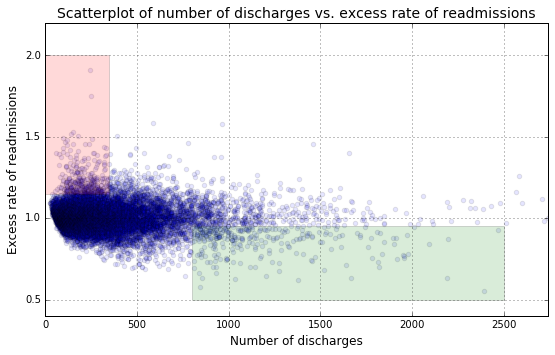

In [12]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.10)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## A

The analysis given is not obviously correct to me. The plot above is difficult to call, with any trend being slight, the distribution of points being uneven, and the points having strong heteroscedascity (non-contistent variation). There is much higher variation at lower discharge levels. 

Similarly, the quoted difference in means is small.

To test the claims, a proper statistical test is needed. 

## A.

I do not agree with the analysis given. For any given hospital each readmission can be considered result of a single random variable with p equal to the true admission rate. The readmission rate for a hospital with n patients is the number of readmission from n samplings of the random variable. For smaller n, we expect there to be greater variation in the number of readmissions. For larger n, the proportion will better approach the "true value". This is the same as with coin tosses. With a smaller number, the proportion may vary from 50/50, but as n approaches infinity, the proportion approaches the theoretical value.

In short, statistically we should expect smaller hospitals to show greater variation in the proportion of readmissions. This does not indicate that they are performing poorly relative to larger hospitals.

## A.

I do not agree with the analysis given. For any given hospital each readmission can be considered result of a single random variable with p equal to the true admission rate. The readmission rate for a hospital with n patients is the number of readmission from n samplings of the random variable. For smaller n, we expect there to be greater variation in the number of readmissions. For larger n, the proportion will better approach the "true value". This is the same as with coin tosses. With a smaller number, the proportion may vary from 50/50, but as n approaches infinity, the proportion approaches the theoretical value.

In short, statistically we should expect smaller hospitals to show greater variation in the proportion of readmissions. This does not indicate that they are performing poorly relative to larger hospitals.

## B.


## 1. Appropriate Hypothesis Test
H0: Large hospitals (number of discharges > 1000) and small hospitals (number of discharges < 100) have the same proportion of hospitals with excess readmissions. p1 - p2 = 0

H1: Large hospitals (number of discharges > 1000) have a lower proportion of excess readmissions rate than small hospitals (number of discharges < 100). p1 - p2 < 0

Sampling distributions are independent.

Smaller hospitals have a higher variance but same true rate.

Okay, lets test the proportions. 

In [22]:
#Check success-failure condition
hospitals = clean_hospital_read_df[81:-3]
p_est = sum(hospitals['Excess Readmission Ratio']>1)/len(hospitals['Excess Readmission Ratio'])
p_est


0.51661736558204285

Assuming all hosptials have the same proportion,i.e. null hypothesis is true, that proportion is 0.517

In [24]:
#We can check the success-failure condition.
n_small = len(hospitals[hospitals['Number of Discharges']<100])
n_large = len(hospitals[hospitals['Number of Discharges']>1000])
print('n_small = ',n_small)
print('n_large = ',n_large)

print(p_est*n_small)
print((1-p_est)*n_small)
print(p_est*n_large)
print((1-p_est)*n_large)

n_small =  1188
n_large =  460
613.741430311
574.258569689
237.643988168
222.356011832


All values > 10, so success-failure condition is met.

In [82]:
#Point Estimate:
hospitals_small = hospitals[hospitals['Number of Discharges']<100]
hospitals_large = hospitals[(hospitals['Number of Discharges']>1000)]#&(hospitals['Predicted Readmission Rate']>10)]

p_small = len(hospitals_small[hospitals['Excess Readmission Ratio']>1])/n_small
print('p_small = ',p_small)

n_large = hospitals_large.shape[0]
p_large = len(hospitals_large[hospitals['Excess Readmission Ratio']>1])/n_large
print('p_large = ',p_large)

p_small =  0.6321548821548821
p_large =  0.44565217391304346


c:\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [78]:
hospitals_large = hospitals[(hospitals['Number of Discharges']>1000)&(hospitals['Predicted Readmission Rate']<10)]
n_large = hospitals_large.shape[0]
p_large = len(hospitals_large[hospitals['Excess Readmission Ratio']>1])/n_large
print('p_large = ',p_large)

p_large =  0.2695035460992908


c:\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [83]:
#Point Estimate:

hospitals_large = hospitals[(hospitals['Number of Discharges']>1000)&
                            (hospitals['Predicted Readmission Rate']>10)]
n_large = hospitals_large.shape[0]
p_large = len(hospitals_large[hospitals['Excess Readmission Ratio']>1])/n_large
print('p_large = ',p_large)

p_large =  0.5235109717868338


c:\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [84]:
p_diff = p_large-p_small
print(p_diff)

-0.10864391036804832


The point estimate is that the proportion of small hospital with excess readmissions is 18.6% larger than the proportion for large hospitals.

In [85]:
SE = np.sqrt(p_est*(1-p_est)/n_small+p_est*(1-p_est)/n_large)
print(SE)
Z = (p_diff-0)/SE
print(Z)

0.0315125165428
-3.44764310462


In [86]:
from scipy import stats
p_val = stats.norm.cdf(Z)*2
p_val

0.00056550074212796772

This test supports the initial analysis and suggests that there is in fact a difference in proportion of hospitals with excess readmission between small and large hospitals.

In [55]:
t_val,p_value = stats.ttest_ind(hospitals_small['Excess Readmission Ratio'],hospitals_large['Excess Readmission Ratio'])
print(t_val)
print(p_value*2)


9.91444296433
3.04247308752e-22


This t-test supports it too.

In [28]:
hospitals_small['Excess Readmission Ratio'].mean()

1.0226183501683506

In [31]:
import seaborn as sns

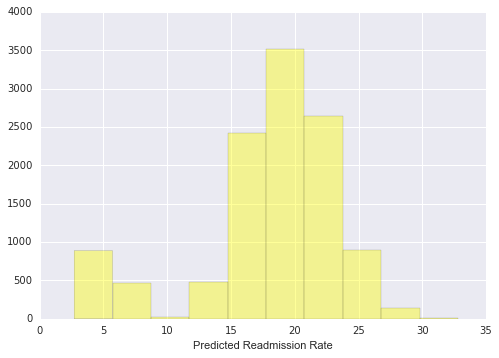

In [55]:
sns.distplot(hospitals['Predicted Readmission Rate'],bins=10,color='yellow',kde=False)

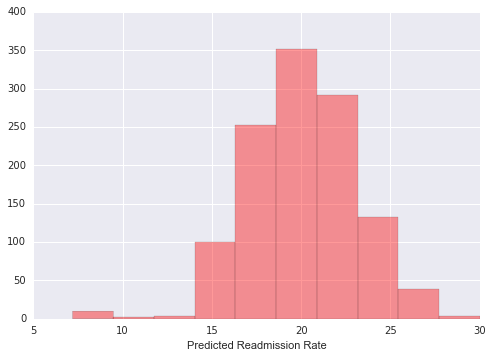

In [58]:
sns.distplot(hospitals_small['Predicted Readmission Rate'],bins=10,color='red',kde=False)

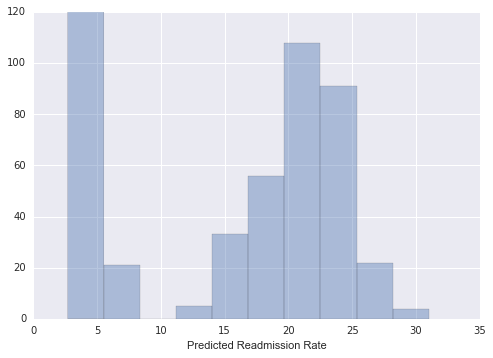

In [53]:
sns.distplot(hospitals_large['Predicted Readmission Rate'],bins=10,kde=False)

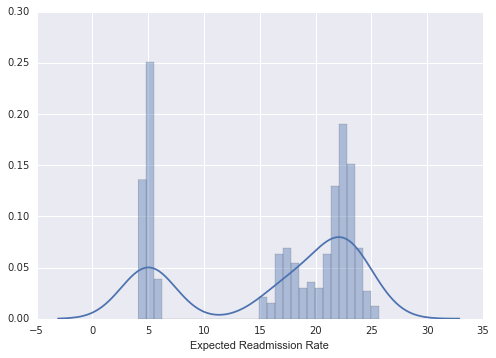

In [39]:
sns.distplot(hospitals_large['Expected Readmission Rate'],bins=30)

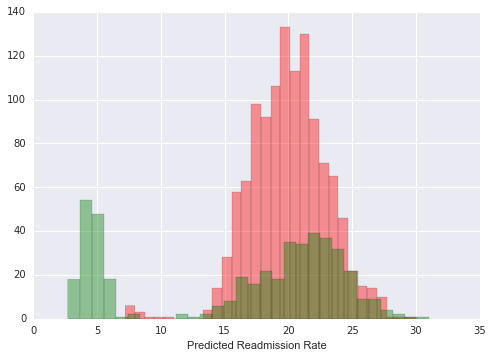

In [60]:
sns.distplot(hospitals_small['Predicted Readmission Rate'],bins=30,color='red',kde=False)
sns.distplot(hospitals_large['Predicted Readmission Rate'],bins=30,color='green',kde=False)


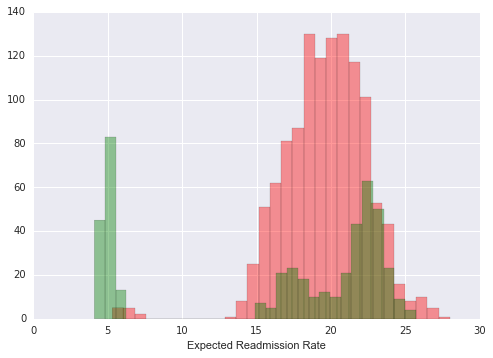

In [61]:
sns.distplot(hospitals_small['Expected Readmission Rate'],bins=30,color='red',kde=False)
sns.distplot(hospitals_large['Expected Readmission Rate'],bins=30,color='green',kde=False)


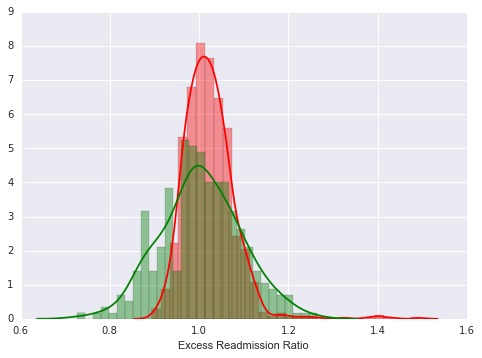

In [69]:
sns.distplot(hospitals_small['Excess Readmission Ratio'],bins=30,color='red')
sns.distplot(hospitals_large['Excess Readmission Ratio'],bins=30,color='green')


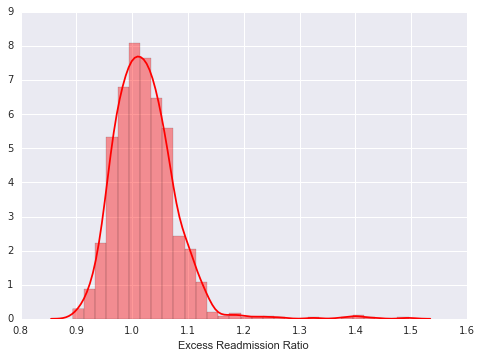

In [29]:
hospitals_large['Excess Readmission Ratio'].mean()

0.9790730434782613

In [47]:
hospitals_large.corr()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
Provider Number,1.000000,-0.009196,NaN,0.025683,0.031422,0.048462,0.029484
Number of Discharges,-0.009196,1.000000,NaN,-0.021222,-0.138943,-0.152674,0.292776
Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Excess Readmission Ratio,0.025683,-0.021222,NaN,1.000000,0.472278,0.323405,0.456704
Predicted Readmission Rate,0.031422,-0.138943,NaN,0.472278,1.000000,0.979997,0.876024
Expected Readmission Rate,0.048462,-0.152674,NaN,0.323405,0.979997,1.000000,0.845657
Number of Readmissions,0.029484,0.292776,NaN,0.456704,0.876024,0.845657,1.000000


In [48]:
hospitals_large.shape[0]

460

In [46]:
hospitals_large[hospitals_large['Expected Readmission Rate']<10]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
821,CRITTENTON HOSPITAL MEDICAL CENTER,230254,MI,READM-30-HIP-KNEE-HRRP,1004,NaN,1.1405,6.1,5.4,64,07/01/2010,06/30/2013
12428,NORTH KANSAS CITY HOSPITAL,260096,MO,READM-30-HIP-KNEE-HRRP,1010,NaN,0.8992,4.5,5.1,44,07/01/2010,06/30/2013
13032,BEEBE MEDICAL CENTER,80007,DE,READM-30-HIP-KNEE-HRRP,1017,NaN,0.8670,4.3,4.9,41,07/01/2010,06/30/2013
13285,UNIVERSITY COLO HEALTH MEMORIAL HOSPITAL CENTRAL,60022,CO,READM-30-HIP-KNEE-HRRP,1023,NaN,0.8426,4.1,4.9,39,07/01/2010,06/30/2013
13674,EISENHOWER MEDICAL CENTER,50573,CA,READM-30-HIP-KNEE-HRRP,1023,NaN,0.7325,4.2,5.7,37,07/01/2010,06/30/2013
12801,FRANCISCAN ST ELIZABETH HEALTH - LAFAYETTE EAST,150109,IN,READM-30-HIP-KNEE-HRRP,1031,NaN,0.8812,4.7,5.3,46,07/01/2010,06/30/2013
13727,SUTTER GENERAL HOSPITAL,50108,CA,READM-30-HIP-KNEE-HRRP,1032,NaN,0.6262,3.0,4.8,23,07/01/2010,06/30/2013
398,MERCY MEDICAL CENTER INC,210008,MD,READM-30-HIP-KNEE-HRRP,1037,NaN,1.1874,5.7,4.8,62,07/01/2010,06/30/2013
1486,PIEDMONT HOSPITAL,110083,GA,READM-30-HIP-KNEE-HRRP,1040,NaN,1.1034,5.0,4.6,54,07/01/2010,06/30/2013
13436,MERCY HOSPITAL,160029,IA,READM-30-HIP-KNEE-HRRP,1045,NaN,0.8236,3.9,4.7,37,07/01/2010,06/30/2013
